## Source:
- https://dashee87.github.io/football/python/predicting-football-results-with-statistical-modelling/
- https://github.com/dashee87/blogScripts/blob/master/Jupyter/2018-09-13-predicting-football-results-with-statistical-modelling-dixon-coles-and-time-weighting.ipynb

In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from scipy.stats import poisson,skellam

In [3]:
df = pd.read_csv('./results/results.csv')

In [4]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
epl_1617 = df[['home_team', 'away_team', 'home_score', 'away_score']]
epl_1617 = epl_1617.rename(columns={'home_score': 'HomeGoals', 'away_score': 'AwayGoals',
                                    'home_team': 'HomeTeam', 'away_team': "AwayTeam"})
epl_1617.head()

,HomeTeam,AwayTeam,HomeGoals,AwayGoals
0,Scotland,England,0,0
1,England,Scotland,4,2
2,Scotland,England,2,1
3,England,Scotland,2,2
4,Scotland,England,3,0


In [6]:
epl_1617.tail()

,HomeTeam,AwayTeam,HomeGoals,AwayGoals
43747,Moldova,Andorra,2,1
43748,Liechtenstein,Latvia,0,2
43749,Chile,Ghana,0,0
43750,Japan,Tunisia,0,3
43751,South Korea,Egypt,4,1


In [7]:
epl_1617 = epl_1617[:-10]
epl_1617.mean()


/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_82342/1701789677.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  epl_1617.mean()


HomeGoals    1.740204
AwayGoals    1.180056
dtype: float64

In [8]:
# probability of draw between home and away team
skellam.pmf(0.0,  epl_1617.mean()[0],  epl_1617.mean()[1])


/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_82342/2555191340.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skellam.pmf(0.0,  epl_1617.mean()[0],  epl_1617.mean()[1])


0.23627079995825298

In [9]:
# probability of home team winning by one goal
skellam.pmf(1,  epl_1617.mean()[0],  epl_1617.mean()[1])


/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_82342/3395712009.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skellam.pmf(1,  epl_1617.mean()[0],  epl_1617.mean()[1])


0.2294120693131687

In [10]:
# importing the tools required for the Poisson regression model
import statsmodels.api as sm
import statsmodels.formula.api as smf

goal_model_data = pd.concat([epl_1617[['HomeTeam','AwayTeam','HomeGoals']].assign(home=1).rename(
            columns={'HomeTeam':'team', 'AwayTeam':'opponent','HomeGoals':'goals'}),
           epl_1617[['AwayTeam','HomeTeam','AwayGoals']].assign(home=0).rename(
            columns={'AwayTeam':'team', 'HomeTeam':'opponent','AwayGoals':'goals'})])

poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data, 
                        family=sm.families.Poisson()).fit()
poisson_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                87484
Model:                            GLM   Df Residuals:                    86864
Model Family:                 Poisson   Df Model:                          619
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.3085e+05
Date:                Sat, 03 Sep 2022   Deviance:                   1.0994e+05
Time:                        18:20:13   Pearson chi2:                 1.04e+05
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3360
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       -0.5560      0.260     -2.137      0.033      -1.066      -0.046
team[T.Afghanistan]                             -0.3551      0.204     -1.743      0.081      -0.754       0.044
team[T.Albania]                                  0.5034      0.191      2.637      0.008       0.129       0.878
team[T.Alderney]                                -1.3790      0.325     -4.246      0.000      -2.016      -0.743
team[T.Algeria]                                  0.7934      0.186      4.257      0.000       0.428       1.159
team[T.American Samoa]                          -1.5775      0.250     -6.316      0.000      -2.067      -1.088
team[T.Andalusia]                                1.0395      0.279      3.726      0.000       0.493       1.586
team[T.Andorra]                                 -0.6797      0.224     -3.037      0.002      -1.118      -0.241
team[T.Angola]                                   0.4251      0.189      2.244      0.025       0.054       0.796
team[T.Anguilla]                                -1.3695      0.246     -5.563      0.000      -1.852      -0.887
team[T.Antigua and Barbuda]                     -0.1014      0.193     -0.524      0.600      -0.480       0.278
team[T.Arameans Suryoye]                         0.1702      0.297      0.573      0.566      -0.412       0.752
team[T.Argentina]                                1.4282      0.184      7.744      0.000       1.067       1.790
team[T.Armenia]                                  0.5418      0.194      2.791      0.005       0.161       0.922
team[T.Artsakh]                                  0.3576      0.245      1.457      0.145      -0.123       0.838
team[T.Aruba]                                   -0.0876      0.200     -0.438      0.662      -0.480       0.305
team[T.Asturias]                                 1.8310      0.703      2.604      0.009       0.453       3.209
team[T.Australia]                                0.9009      0.185      4.867      0.000       0.538       1.264
team[T.Austria]                                  1.3060      0.185      7.070      0.000       0.944       1.668
team[T.Azerbaijan]                               0.1420      0.196      0.724      0.469      -0.243       0.527
team[T.Bahamas]                                 -0.8117      0.231     -3.518      0.000      -1.264      -0.359
team[T.Bahrain]                                  0.4357      0.187      2.330      0.020       0.069       0.802
team[T.Bangladesh]                              -0.6459      0.197     -3.286      0.001      -1.031      -0.261
team[T.Barawa]                                  -0.8553      0.306     -2.792      0.005      -1.456      -0.255
team[T.Barbados]                

- Dep. Variable: 	goals 	
- No. Observations: 	87484
- Model: 	GLM 	
- Df Residuals: 	86864
- Model Family: 	
- Poisson 	Df Model: 	619
- Link Function: 	Log 	
- Scale: 	1.0000
- Method: 	IRLS 	
- Log-Likelihood: 	-1.3085e+05
- Date: 	Fri, 02 Sep 2022 	
- Deviance: 	1.0994e+05
- Time: 	13:13:15 	
- Pearson chi2: 	1.04e+05
- No. Iterations: 	22 	
- Pseudo R-squ. (CS): 	0.3360
- Covariance Type: 	nonrobust 		

In [11]:
poisson_model.predict(pd.DataFrame(data={'team': 'Italy', 'opponent': 'Germany',
                                       'home':0},index=[1]))


1    1.08093
dtype: float64

In [12]:
poisson_model.predict(pd.DataFrame(data={'team': 'Germany', 'opponent': 'Italy',
                                       'home':1},index=[1]))


1    1.628253
dtype: float64

In [13]:
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam, 
                                                            'opponent': awayTeam,'home':1},
                                                      index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam, 
                                                            'opponent': homeTeam,'home':0},
                                                      index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals+1)] for team_avg in [home_goals_avg, away_goals_avg]]
    return(np.outer(np.array(team_pred[0]), np.array(team_pred[1])))
simulate_match(poisson_model, 'Germany', 'Italy', max_goals=3)


array([[0.06659117, 0.07198042, 0.03890291, 0.01401711],
       [0.10842727, 0.11720233, 0.06334378, 0.02282341],
       [0.0882735 , 0.09541751, 0.05156985, 0.01858114],
       [0.04791053, 0.05178795, 0.02798958, 0.01008493]])

In [14]:
ger_ita = simulate_match(poisson_model, "Germany", "Italy", max_goals=10)
# Germany win
np.sum(np.tril(ger_ita, -1))


0.5010611508389644

In [15]:
# draw
np.sum(np.diag(ger_ita))


0.24663969384970882

In [16]:
# Italy win
np.sum(np.triu(ger_ita, 1))

0.2522979222204328

# -----------

In [17]:
from matplotlib.colors import ListedColormap

def matrix_gif(matrix, colour_matrix, colour_map, subtitle="", heatmap=False, alpha=0.8):
    fig, ax1 = plt.subplots(1, figsize=(5,5))
    if heatmap:
        ax1.matshow(matrix, alpha=alpha)
    else:
        ax1.matshow(colour_matrix, cmap=colour_map, alpha=alpha)
    ax1.tick_params(axis=u'both', which=u'both',length=0)
    ax1.grid(which='major', axis='both', linestyle='')
    ax1.set_xlabel('Away Team Goals', fontsize=12)
    ax1.set_ylabel('Home Team Goals', fontsize=12)
    ax1.xaxis.set_label_position('top')
    nrows, ncols = matrix.shape
    for i in range(nrows):
        for j in range(ncols):
            c = matrix[i][j]
            ax1.text(j, i, str(round(c,4)), va='center', ha='center', size=13)
    plt.figtext(0.5, 0.05, subtitle, horizontalalignment='center',
                fontsize=14, multialignment='left', fontweight='bold')
    return fig

cmap = ListedColormap(['w', '#04f5ff', '#00ff85', '#e90052'])
matrix = simulate_match(poisson_model, 'Switzerland', 'Germany', max_goals=5)
matn = len(matrix)
matrix_gif(matrix, matrix, ListedColormap(['w']), heatmap=True, 
           alpha=0.6, subtitle="Match Score Probability Matrix").savefig("match_matrix_0.png")
plt.close()
for t,(mat,colour,subtitle) in enumerate(zip([np.zeros((matn, matn)), np.tril(np.ones((matn,matn)),-1),
                            np.triu(np.ones((matn,matn))*2,1), np.diag([3]*matn),
                                             np.array([0 if i+j<3 else 1 for i in range(matn) for j in range(matn)]).reshape(matn,matn)],
                          ['w', '#04f5ff', '#00ff85', '#e90052','#EAF205'],
                                   ['Match Score Probability Matrix', 'Home Win', 'Away Win', 'Draw', 'Over 2.5 goals'])):
    matrix_gif(matrix, mat, ListedColormap(['w'] + [colour]), heatmap=False, 
               alpha=0.6, subtitle=subtitle).savefig("match_matrix_{}.png".format(t+1))
    plt.close()

In [18]:
poisson_model.predict(pd.DataFrame(data={'team': 'Switzerland', 'opponent': 'Germany',
                                       'home':1},index=[1]))


1    1.33289
dtype: float64

In [19]:
poisson_model.predict(pd.DataFrame(data={'team': 'Germany', 'opponent': 'Switzerland',
                                       'home':0},index=[1]))


1    1.952036
dtype: float64

In [20]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [21]:
football_url = df

In [22]:
def poiss_actual_diff(football_url, max_goals):
    epl_1718 = pd.read_csv(football_url)
    epl_1718 = epl_1718[['home_team','away_team','home_score','away_score']]
    epl_1718 = epl_1718.rename(columns={'home_score': 'HomeGoals', 'away_score': 'AwayGoals'})
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals)] \
                 for team_avg in [epl_1718['HomeGoals'].mean(), epl_1718['AwayGoals'].mean()]]
    return np.outer(np.array(team_pred[0]), np.array(team_pred[1])) - \
        np.array([sum((epl_1718['HomeGoals']==i) & (epl_1718['AwayGoals']==j)) 
                  for i in range(max_goals) for j in range(max_goals)]).reshape((6,6))/len(epl_1718)

year_arrays = []
for year in range(2005,2018):
    year_arrays.append(poiss_actual_diff("./results/results.csv".format(
        str(year)[-2:], str(year+1)[-2:]),6))



In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import poisson,skellam
from scipy.optimize import minimize

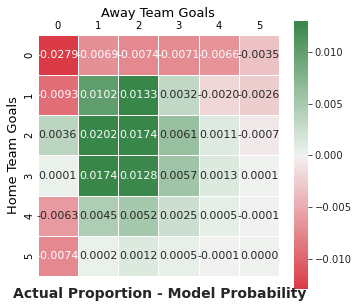

In [24]:


cmap = sns.diverging_palette(10, 133, as_cmap=True)

fig, ax = plt.subplots(figsize=(5,5))  
with sns.axes_style("white"):
    ax = sns.heatmap(np.mean(year_arrays, axis=0), annot=True, fmt='.4f', cmap=cmap, vmin=-0.013, vmax=.013, center=0.00,
                square=True, linewidths=.5, annot_kws={"size": 11}, cbar_kws={"shrink": .8})
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.grid(which='major', axis='both', linestyle='')
    ax.set_xlabel('Away Team Goals', fontsize=13)
    ax.set_ylabel('Home Team Goals', fontsize=13)
    ax.xaxis.set_label_position('top')
    ax.xaxis.set_ticks_position('top')
    plt.figtext(0.45, 0.1, 'Actual Proportion - Model Probability', horizontalalignment='center',
                fontsize=14, multialignment='left', fontweight='bold')
plt.tight_layout()
plt.show()



In [25]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [26]:
epl_1718 = pd.read_csv('./results/results.csv')
epl_1718 = epl_1718[['home_team','away_team','home_score','away_score']]
epl_1718 = epl_1718.rename(columns={'home_score': 'HomeGoals', 'away_score': 'AwayGoals', 
                                    "home_team": 'HomeTeam', 'away_team': 'AwayTeam'})

Alternatively, I suggest using ax.set_xticks(...) 
to define the FixedLocator tick positions and then 
ax.set_xticklables(...) to set the labels.

/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_82342/1047492062.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  poisson_pred = np.column_stack([[poisson.pmf(i, epl_1718.mean()[j]) for i in range(8)] for j in range(2)])


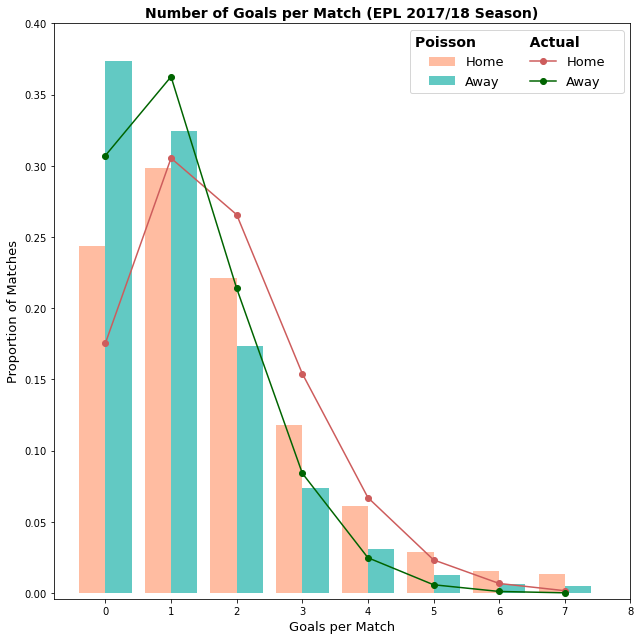

In [42]:
# construct Poisson  for each mean goals value
poisson_pred = np.column_stack([[poisson.pmf(i, epl_1718.mean()[j]) for i in range(8)] for j in range(2)])

fig, ax = plt.subplots(figsize=(9,9))  
# plot histogram of actual goals
plt.hist(epl_1718[['HomeGoals', 'AwayGoals']].values, range(9), 
         alpha=0.7, label=['Home', 'Away'],density=True, color=["#FFA07A", "#20B2AA"])

# add lines for the Poisson distributions
pois1, = plt.plot([i-0.5 for i in range(1,9)], poisson_pred[:,0],
                  linestyle='-', marker='o',label="Home", color = '#CD5C5C')
pois2, = plt.plot([i-0.5 for i in range(1,9)], poisson_pred[:,1],
                  linestyle='-', marker='o',label="Away", color = '#006400')

leg=plt.legend(loc='upper right', fontsize=13, ncol=2)
leg.set_title("Poisson           Actual        ", prop = {'size':'14', 'weight':'bold'})

plt.xticks([i-0.5 for i in range(1,10)],[i for i in range(9)])
plt.xlabel("Goals per Match",size=13)
plt.ylabel("Proportion of Matches",size=13)
plt.title("Number of Goals per Match (EPL 2017/18 Season)",size=14,fontweight='bold')
plt.ylim([-0.004, 0.4])
plt.tight_layout()
plt.show()



In [30]:
# probability of draw between home and away team
skellam.pmf(0.0,  epl_1617.mean()[0],  epl_1617.mean()[1])

/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_82342/3185007211.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skellam.pmf(0.0,  epl_1617.mean()[0],  epl_1617.mean()[1])


0.23627079995825298

In [31]:
# probability of home team winning by one goal
skellam.pmf(1,  epl_1617.mean()[0],  epl_1617.mean()[1])

/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_82342/58550314.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skellam.pmf(1,  epl_1617.mean()[0],  epl_1617.mean()[1])


0.2294120693131687

/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_82342/4038738579.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skellam_pred = [skellam.pmf(i,  epl_1617.mean()[0],  epl_1617.mean()[1]) for i in range(-6,8)]


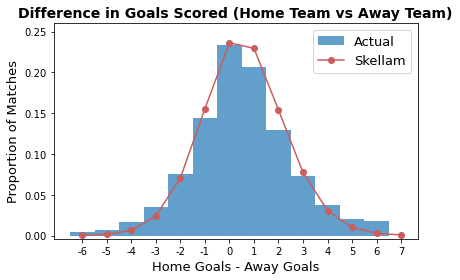

In [43]:
skellam_pred = [skellam.pmf(i,  epl_1617.mean()[0],  epl_1617.mean()[1]) for i in range(-6,8)]

plt.hist(epl_1617[['HomeGoals']].values - epl_1617[['AwayGoals']].values, range(-6,8), 
         alpha=0.7, label='Actual',density=True)
plt.plot([i+0.5 for i in range(-6,8)], skellam_pred,
                  linestyle='-', marker='o',label="Skellam", color = '#CD5C5C')
plt.legend(loc='upper right', fontsize=13)
plt.xticks([i+0.5 for i in range(-6,8)],[i for i in range(-6,8)])
plt.xlabel("Home Goals - Away Goals",size=13)
plt.ylabel("Proportion of Matches",size=13)
plt.title("Difference in Goals Scored (Home Team vs Away Team)",size=14,fontweight='bold')
plt.ylim([-0.004, 0.26])
plt.tight_layout()
plt.show()

TypeError: only size-1 arrays can be converted to Python scalars

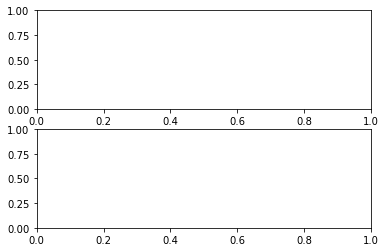

In [44]:
fig,(ax1,ax2) = plt.subplots(2, 1)


chel_home = epl_1617[epl_1617['HomeTeam']=='Switzerland'][['HomeGoals']].apply(pd.value_counts,normalize=True)
chel_home_pois = [poisson.pmf(i,np.sum(np.multiply(chel_home.values.T,chel_home.index.T),axis=1)[0]) for i in range(8)]
sun_home = epl_1617[epl_1617['HomeTeam']=='Brazil'][['HomeGoals']].apply(pd.value_counts,normalize=True)
sun_home_pois = [poisson.pmf(i,np.sum(np.multiply(sun_home.values.T,sun_home.index.T),axis=1)[0]) for i in range(8)]

chel_away = epl_1617[epl_1617['AwayTeam']=='Switzerland'][['AwayGoals']].apply(pd.value_counts,normalize=True)
chel_away_pois = [poisson.pmf(i,np.sum(np.multiply(chel_away.values.T,chel_away.index.T),axis=1)[0]) for i in range(8)]
sun_away = epl_1617[epl_1617['AwayTeam']=='Brazil'][['AwayGoals']].apply(pd.value_counts,normalize=True)
sun_away_pois = [poisson.pmf(i,np.sum(np.multiply(sun_away.values.T,sun_away.index.T),axis=1)[0]) for i in range(8)]

ax1.bar(chel_home.index-0.4,chel_home.values,width=0.4,color="#034694",label="Switzerland")
ax1.bar(sun_home.index,sun_home.values,width=0.4,color="#EB172B",label="Brazil")
pois1, = ax1.plot([i for i in range(8)], chel_home_pois,
                  linestyle='-', marker='o',label="Switzerland", color = "#0a7bff")
pois1, = ax1.plot([i for i in range(8)], sun_home_pois,
                  linestyle='-', marker='o',label="Brazil", color = "#ff7c89")
leg=ax1.legend(loc='upper right', fontsize=12, ncol=2)
leg.set_title("Poisson                 Actual                ", prop = {'size':'14', 'weight':'bold'})
ax1.set_xlim([-0.5,7.5])
ax1.set_ylim([-0.01,0.65])
ax1.set_xticklabels([])
# mimicing the facet plots in ggplot2 with a bit of a hack
ax1.text(7.65, 0.585, '                Home                ', rotation=-90,
        bbox={'facecolor':'#ffbcf6', 'alpha':0.5, 'pad':5})
ax2.text(7.65, 0.585, '                Away                ', rotation=-90,
        bbox={'facecolor':'#ffbcf6', 'alpha':0.5, 'pad':5})

ax2.bar(chel_away.index-0.4,chel_away.values,width=0.4,color="#034694",label="Switzerland")
ax2.bar(sun_away.index,sun_away.values,width=0.4,color="#EB172B",label="Brazil")
pois1, = ax2.plot([i for i in range(8)], chel_away_pois,
                  linestyle='-', marker='o',label="Switzerland", color = "#0a7bff")
pois1, = ax2.plot([i for i in range(8)], sun_away_pois,
                  linestyle='-', marker='o',label="Brazil", color = "#ff7c89")
ax2.set_xlim([-0.5,7.5])
ax2.set_ylim([-0.01,0.65])
ax1.set_title("Number of Goals per Match (EPL 2016/17 Season)",size=14,fontweight='bold')
ax2.set_xlabel("Goals per Match",size=13)
ax2.text(-1.15, 0.9, 'Proportion of Matches', rotation=90, size=13)
plt.tight_layout()
plt.show()

In [34]:
# importing the tools required for the Poisson regression model
import statsmodels.api as sm
import statsmodels.formula.api as smf

goal_model_data = pd.concat([epl_1617[['HomeTeam','AwayTeam','HomeGoals']].assign(home=1).rename(
            columns={'HomeTeam':'team', 'AwayTeam':'opponent','HomeGoals':'goals'}),
           epl_1617[['AwayTeam','HomeTeam','AwayGoals']].assign(home=0).rename(
            columns={'AwayTeam':'team', 'HomeTeam':'opponent','AwayGoals':'goals'})])

poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data, 
                        family=sm.families.Poisson()).fit()
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                87484
Model:                            GLM   Df Residuals:                    86864
Model Family:                 Poisson   Df Model:                          619
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.3085e+05
Date:                Sat, 03 Sep 2022   Deviance:                   1.0994e+05
Time:                        18:24:27   Pearson chi2:                 1.04e+05
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3360
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       -0.5560      0.260     -2.137      0.033      -1.066      -0.046
team[T.Afghanistan]                             -0.3551      0.204     -1.743      0.081      -0.754       0.044
team[T.Albania]                                  0.5034      0.191      2.637      0.008       0.129       0.878
team[T.Alderney]                                -1.3790      0.325     -4.246      0.000      -2.016      -0.743
team[T.Algeria]                                  0.7934      0.186      4.257      0.000       0.428       1.159
team[T.American Samoa]                          -1.5775      0.250     -6.316      0.000      -2.067      -1.088
team[T.Andalusia]                                1.0395      0.279      3.726      0.000       0.493       1.586
team[T.Andorra]                                 -0.6797      0.224     -3.037      0.002      -1.118      -0.241
team[T.Angola]                                   0.4251      0.189      2.244      0.025       0.054       0.796
team[T.Anguilla]                                -1.3695      0.246     -5.563      0.000      -1.852      -0.887
team[T.Antigua and Barbuda]                     -0.1014      0.193     -0.524      0.600      -0.480       0.278
team[T.Arameans Suryoye]                         0.1702      0.297      0.573      0.566      -0.412       0.752
team[T.Argentina]                                1.4282      0.184      7.744      0.000       1.067       1.790
team[T.Armenia]                                  0.5418      0.194      2.791      0.005       0.161       0.922
team[T.Artsakh]                                  0.3576      0.245      1.457      0.145      -0.123       0.838
team[T.Aruba]                                   -0.0876      0.200     -0.438      0.662      -0.480       0.305
team[T.Asturias]                                 1.8310      0.703      2.604      0.009       0.453       3.209
team[T.Australia]                                0.9009      0.185      4.867      0.000       0.538       1.264
team[T.Austria]                                  1.3060      0.185      7.070      0.000       0.944       1.668
team[T.Azerbaijan]                               0.1420      0.196      0.724      0.469      -0.243       0.527
team[T.Bahamas]                                 -0.8117      0.231     -3.518      0.000      -1.264      -0.359
team[T.Bahrain]                                  0.4357      0.187      2.330      0.020       0.069       0.802
team[T.Bangladesh]                              -0.6459      0.197     -3.286      0.001      -1.031      -0.261
team[T.Barawa]                                  -0.8553      0.306     -2.792      0.005      -1.456      -0.255
team[T.Barbados]                

In [ ]:
# importing the tools required for the Poisson regression model
import statsmodels.api as sm
import statsmodels.formula.api as smf

goal_model_data = pd.concat([epl_1718[['HomeTeam','AwayTeam','HomeGoals']].assign(home=1).rename(
            columns={'HomeTeam':'team', 'AwayTeam':'opponent','HomeGoals':'goals'}),
           epl_1718[['AwayTeam','HomeTeam','AwayGoals']].assign(home=0).rename(
            columns={'AwayTeam':'team', 'HomeTeam':'opponent','AwayGoals':'goals'})])

poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data, 
                        family=sm.families.Poisson()).fit()

print(poisson_model.summary())



In [ ]:
poisson_model.predict(pd.DataFrame(data={'team': 'Switzerland', 'opponent': 'Brazil',
                                       'home':1},index=[1]))

In [ ]:
poisson_model.predict(pd.DataFrame(data={'team': 'Brazil', 'opponent': 'Switzerland',
                                       'home':0},index=[1]))

In [ ]:
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam, 
                                                            'opponent': awayTeam,'home':1},
                                                      index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam, 
                                                            'opponent': homeTeam,'home':0},
                                                      index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals+1)] for team_avg in [home_goals_avg, away_goals_avg]]
    return(np.outer(np.array(team_pred[0]), np.array(team_pred[1])))
ars_sou = simulate_match(poisson_model, 'Switzerland', 'Brazil', max_goals=10)
print(ars_sou[0:5, 0:5])

In [ ]:
from matplotlib.colors import ListedColormap

def matrix_gif(matrix, colour_matrix, colour_map, subtitle="", heatmap=False, alpha=0.8):
    fig, ax1 = plt.subplots(1, figsize=(5,5))
    if heatmap:
        ax1.matshow(matrix, alpha=alpha)
    else:
        ax1.matshow(colour_matrix, cmap=colour_map, alpha=alpha)
    ax1.tick_params(axis=u'both', which=u'both',length=0)
    ax1.grid(which='major', axis='both', linestyle='')
    ax1.set_xlabel('Away Team Goals', fontsize=12)
    ax1.set_ylabel('Home Team Goals', fontsize=12)
    ax1.xaxis.set_label_position('top')
    nrows, ncols = matrix.shape
    for i in range(nrows):
        for j in range(ncols):
            c = matrix[i][j]
            ax1.text(j, i, str(round(c,4)), va='center', ha='center', size=13)
    plt.figtext(0.5, 0.05, subtitle, horizontalalignment='center',
                fontsize=14, multialignment='left', fontweight='bold')
    return fig

cmap = ListedColormap(['w', '#04f5ff', '#00ff85', '#e90052'])
matrix = simulate_match(poisson_model, 'Switzerland', 'Brazil', max_goals=5)
matn = len(matrix)
matrix_gif(matrix, matrix, ListedColormap(['w']), heatmap=True, 
           alpha=0.6, subtitle="Match Score Probability Matrix").savefig("match_matrix_0.png")
plt.close()
for t,(mat,colour,subtitle) in enumerate(zip([np.zeros((matn, matn)), np.tril(np.ones((matn,matn)),-1),
                            np.triu(np.ones((matn,matn))*2,1), np.diag([3]*matn),
                                             np.array([0 if i+j<3 else 1 for i in range(matn) for j in range(matn)]).reshape(matn,matn)],
                          ['w', '#04f5ff', '#00ff85', '#e90052','#EAF205'],
                                   ['Match Score Probability Matrix', 'Home Win', 'Away Win', 'Draw', 'Over 2.5 goals'])):
    matrix_gif(matrix, mat, ListedColormap(['w'] + [colour]), heatmap=False, 
               alpha=0.6, subtitle=subtitle).savefig("match_matrix_{}.png".format(t+1))
    plt.close()

# Dixon-Coles Model

In [ ]:
epl_1718.head()

In [ ]:
df.head()

In [ ]:
def poiss_actual_diff(football_url, max_goals):
    epl_1718 = pd.read_csv('./results/results.csv')
    epl_1718 = epl_1718[['home_team','away_team','home_score','away_score']]
    epl_1718 = epl_1718.rename(columns={'home_score': 'HomeGoals', 'away_score': 'AwayGoals', 
                                        'away_team': 'AwayTeam', 'home__team': 'HomeTeam'})
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals)] \
                 for team_avg in [epl_1718['HomeGoals'].mean(), epl_1718['AwayGoals'].mean()]]
    return np.outer(np.array(team_pred[0]), np.array(team_pred[1])) - \
        np.array([sum((epl_1718['HomeGoals']==i) & (epl_1718['AwayGoals']==j)) 
                  for i in range(max_goals) for j in range(max_goals)]).reshape((6,6))/len(epl_1718)

year_arrays = []
for year in range(2005,2018):
    year_arrays.append(poiss_actual_diff("http://www.football-data.co.uk/mmz4281/{}{}/E0.csv".format(
        str(year)[-2:], str(year+1)[-2:]),6))



In [ ]:
cmap = sns.diverging_palette(10, 133, as_cmap=True)

fig, ax = plt.subplots(figsize=(5,5))  
with sns.axes_style("white"):
    ax = sns.heatmap(np.mean(year_arrays, axis=0), annot=True, fmt='.4f', cmap=cmap, vmin=-0.013, vmax=.013, center=0.00,
                square=True, linewidths=.5, annot_kws={"size": 11}, cbar_kws={"shrink": .8})
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.grid(which='major', axis='both', linestyle='')
    ax.set_xlabel('Away Team Goals', fontsize=13)
    ax.set_ylabel('Home Team Goals', fontsize=13)
    ax.xaxis.set_label_position('top')
    ax.xaxis.set_ticks_position('top')
    plt.figtext(0.45, 0.1, 'Actual Proportion - Model Probability', horizontalalignment='center',
                fontsize=14, multialignment='left', fontweight='bold')
plt.tight_layout()
plt.show()


In [ ]:
def rho_correction(x, y, lambda_x, mu_y, rho):
    if x==0 and y==0:
        return 1- (lambda_x * mu_y * rho)
    elif x==0 and y==1:
        return 1 + (lambda_x * rho)
    elif x==1 and y==0:
        return 1 + (mu_y * rho)
    elif x==1 and y==1:
        return 1 - rho
    else:
        return 1.0


In [ ]:
def dc_log_like(x, y, alpha_x, beta_x, alpha_y, beta_y, rho, gamma):
    lambda_x, mu_y = np.exp(alpha_x + beta_y + gamma), np.exp(alpha_y + beta_x) 
    return (np.log(rho_correction(x, y, lambda_x, mu_y, rho)) + 
            np.log(poisson.pmf(x, lambda_x)) + np.log(poisson.pmf(y, mu_y)))

In [ ]:
def solve_parameters(dataset, debug = False, init_vals=None, options={'disp': True, 'maxiter':100},
                     constraints = [{'type':'eq', 'fun': lambda x: sum(x[:20])-20}] , **kwargs):
    teams = np.sort(dataset['HomeTeam'].unique())
    # check for no weirdness in dataset
    away_teams = np.sort(dataset['AwayTeam'].unique())
    if not np.array_equal(teams, away_teams):
        raise ValueError("Something's not right")
    n_teams = len(teams)
    if init_vals is None:
        # random initialisation of model parameters
        init_vals = np.concatenate((np.random.uniform(0,1,(n_teams)), # attack strength
                                      np.random.uniform(0,-1,(n_teams)), # defence strength
                                      np.array([0, 1.0]) # rho (score correction), gamma (home advantage)
                                     ))
    def dc_log_like(x, y, alpha_x, beta_x, alpha_y, beta_y, rho, gamma):
        lambda_x, mu_y = np.exp(alpha_x + beta_y + gamma), np.exp(alpha_y + beta_x) 
        return (np.log(rho_correction(x, y, lambda_x, mu_y, rho)) + 
                np.log(poisson.pmf(x, lambda_x)) + np.log(poisson.pmf(y, mu_y)))

    def estimate_paramters(params):
        score_coefs = dict(zip(teams, params[:n_teams]))
        defend_coefs = dict(zip(teams, params[n_teams:(2*n_teams)]))
        rho, gamma = params[-2:]
        log_like = [dc_log_like(row.HomeGoals, row.AwayGoals, score_coefs[row.HomeTeam], defend_coefs[row.HomeTeam],
                     score_coefs[row.AwayTeam], defend_coefs[row.AwayTeam], rho, gamma) for row in dataset.itertuples()]
        return -sum(log_like)
    opt_output = minimize(estimate_paramters, init_vals, options=options, constraints = constraints, **kwargs)
    if debug:
        # sort of hacky way to investigate the output of the optimisation process
        return opt_output
    else:
        return dict(zip(["attack_"+team for team in teams] + 
                        ["defence_"+team for team in teams] +
                        ['rho', 'home_adv'],
                        opt_output.x)) 

In [ ]:
# ['HomeTeam','AwayTeam','FTHG','FTAG'

In [ ]:
epl_1718 = pd.read_csv('./results/results.csv')
epl_1718 = epl_1718[['home_team','away_team','home_score','away_score']]
epl_1718 = epl_1718.rename(columns={'home_score': 'HomeGoals', 'away_score': 'AwayGoals', 
                                        'away_team': 'AwayTeam', 'home_team': 'HomeTeam'})

In [ ]:
epl_1718


In [ ]:
params = solve_parameters(epl_1718)

In [ ]:
params

In [ ]:
def calc_means(param_dict, homeTeam, awayTeam):
    return [np.exp(param_dict['attack_'+homeTeam] + param_dict['defence_'+awayTeam] + param_dict['home_adv']),
            np.exp(param_dict['defence_'+homeTeam] + param_dict['attack_'+awayTeam])]

def dixon_coles_simulate_match(params_dict, homeTeam, awayTeam, max_goals=10):
    team_avgs = calc_means(params_dict, homeTeam, awayTeam)
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals+1)] for team_avg in team_avgs]
    output_matrix = np.outer(np.array(team_pred[0]), np.array(team_pred[1]))
    correction_matrix = np.array([[rho_correction(home_goals, away_goals, team_avgs[0],
                                                   team_avgs[1], params['rho']) for away_goals in range(2)]
                                   for home_goals in range(2)])
    output_matrix[:2,:2] = output_matrix[:2,:2] * correction_matrix
    return output_matrix



In [ ]:
ars_sou_dc = dixon_coles_simulate_match(params, 'Switzerland', 'Brazil', max_goals=10)

In [ ]:
# [Simple Poisson, Dixon-Coles]
print("Arsenal Win")
print('; '.join("{0}: {1:.5f}".format(model, prob) for model,prob in 
          zip(["Basic Poisson", "Dixon-Coles"], list(map(lambda x:np.sum(np.tril(x, -1)), [ars_sou, ars_sou_dc])))))
print("Southampton Win")
print('; '.join("{0}: {1:.5f}".format(model, prob) for model,prob in 
          zip(["Basic Poisson", "Dixon-Coles"], list(map(lambda x:np.sum(np.triu(x, 1)), [ars_sou, ars_sou_dc])))))
print("Draw")
print('; '.join("{0}: {1:.5f}".format(model, prob) for model,prob in 
          zip(["Basic Poisson", "Dixon-Coles"], list(map(lambda x:np.sum(np.diag(x)), [ars_sou, ars_sou_dc])))))



In [ ]:
cmap = sns.diverging_palette(10, 133, as_cmap=True)

fig, ax = plt.subplots(figsize=(5,5))    
with sns.axes_style("white"):
    ax = sns.heatmap(simulate_match(poisson_model, 'Arsenal', 'Southampton', max_goals=5) - \
                     dixon_coles_simulate_match(params, 'Arsenal', 'Southampton', max_goals=5), 
                     annot=True, fmt='.4f', cmap=cmap, vmin=-0.013, vmax=.013, center=0.00,
                     square=True, linewidths=.5, annot_kws={"size": 11}, cbar_kws={"shrink": .8})
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.grid(which='major', axis='both', linestyle='')
    ax.set_xlabel('Away Team Goals', fontsize=13)
    ax.set_ylabel('Home Team Goals', fontsize=13)
    ax.xaxis.set_label_position('top')
    ax.xaxis.set_ticks_position('top')
    plt.figtext(0.45, 0.07, '  BP Probs - DC Probs \nArsenal v Southampton', horizontalalignment='center',
                fontsize=14, multialignment='left', fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
fig,(ax1,ax2) = plt.subplots(2, 1, figsize=(10,5))

ax1.plot(range(1000), [0 if y >600 else 1 for y in range(1000)], label='Component 1', color='#38003c', marker='')
ax2.plot(range(1000), np.exp([y*-0.005 for y in range(1000)]), label='Component 1', color='#07F2F2', marker='')
ax2.plot(range(1000), np.exp([y*-0.003 for y in range(1000)]), label='Component 1', color='#05F26C', marker='')
ax2.plot(range(1000), np.exp([y*-0.001 for y in range(1000)]), label='Component 1', color='#e90052', marker='')

ax1.set_ylim([-0.05,1.05])
ax2.set_ylim([-0.05,1.05])
ax1.set_xlim([-0.5,1000])
ax2.set_xlim([-0.5,1000])
ax1.set_xticklabels([])
ax2.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_tick_params(labelsize=12)
ax2.yaxis.set_tick_params(labelsize=12)
ax1.set_title("Time Decay Weighting Functions",size=14,fontweight='bold')
ax2.set_xlabel("Number of Days Ago",size=13)
ax1.set_ylabel("ϕ(t)",size=13)
ax2.set_ylabel("ϕ(t)",size=13)
ax1.text(830, 0.5, '1     $t \leq \mathregular{t_0}$\n0     $t > \mathregular{t_0}$',
        verticalalignment='bottom', horizontalalignment='left',
        color='black', fontsize=15)
ax1.text(800, 0.5, '{',
        verticalalignment='bottom', horizontalalignment='left',
        color='black', fontsize=44)
ax1.text(730, 0.62, 'ϕ(t)  = ',
        verticalalignment='bottom', horizontalalignment='left',
        color='black', fontsize=15)
ax2.text(730, 0.62, 'ϕ(t)  =   exp(−ξt)',
        verticalalignment='bottom', horizontalalignment='left',
        color='black', fontsize=15)
ax2.text(250, 0.8, 'ξ = 0.001',
        verticalalignment='bottom', horizontalalignment='left',
        color='#e90052', fontsize=15)
ax2.text(250, 0.5, 'ξ = 0.003',
        verticalalignment='bottom', horizontalalignment='left',
        color='#05F26C', fontsize=15)
ax2.text(250, 0.0, 'ξ = 0.005',
        verticalalignment='bottom', horizontalalignment='left',
        color='#07F2F2', fontsize=15)
plt.tight_layout()
plt.show()

In [ ]:
def dc_log_like_decay(x, y, alpha_x, beta_x, alpha_y, beta_y, rho, gamma, t, xi=0):
    lambda_x, mu_y = np.exp(alpha_x + beta_y + gamma), np.exp(alpha_y + beta_x) 
    return  np.exp(-xi*t) * (np.log(rho_correction(x, y, lambda_x, mu_y, rho)) + 
                              np.log(poisson.pmf(x, lambda_x)) + np.log(poisson.pmf(y, mu_y)))

In [ ]:
epl_1718 = pd.read_csv("./results/results.csv")


In [ ]:
epl_1718.head()

In [ ]:
#Adding goal difference and establishing who is the winner 
FTR = []
count = 0
for i in range (len(epl_1718['home_team'])):
    if epl_1718['home_score'][i] > epl_1718['away_score'][i]:
        count = count + 1
        FTR.append('H')
    elif epl_1718['home_score'][i] < epl_1718['away_score'][i]:
        FTR.append('A')
        count = count + 1
    else:
        FTR.append('D')
        count = count + 1
epl_1718['FTR'] = FTR

#adding goal difference column
epl_1718['goal_difference'] = np.absolute(epl_1718['home_score'] - epl_1718['away_score'])

epl_1718.head()

In [ ]:
epl_1718.head()

In [ ]:
epl_1718.info()

In [ ]:
epl_1718['Date'] = pd.to_datetime(epl_1718['date'],  format='%Y/%m/%d')


In [ ]:
epl_1718

In [ ]:
epl_1718.info()

In [ ]:
epl_1718['time_diff'] = (max(epl_1718['Date']) - epl_1718['Date']).dt.days


In [ ]:
epl_1718.head()

In [ ]:
epl_1718 = epl_1718[['home_team','away_team','home_score','away_score', 'FTR', 'time_diff']]
epl_1718 = epl_1718.rename(columns={'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals'})
epl_1718.head()

In [ ]:
epl_1718 = epl_1718.rename({'home_team': 'HomeTeam', 'away_team': 'AwayTeam', 
                            'home_score': 'HomeGoals', 'away_score': 'AwayGoals'}, axis=1)  # new method

In [ ]:
epl_1718

In [ ]:
def solve_parameters_decay(dataset, xi=0.001, debug = False, init_vals=None, options={'disp': True, 'maxiter':100},
                     constraints = [{'type':'eq', 'fun': lambda x: sum(x[:20])-20}] , **kwargs):
    teams = np.sort(dataset['HomeTeam'].unique())
    # check for no weirdness in dataset
    away_teams = np.sort(dataset['AwayTeam'].unique())
    if not np.array_equal(teams, away_teams):
        raise ValueError("something not right")
    n_teams = len(teams)
    if init_vals is None:
        # random initialisation of model parameters
        init_vals = np.concatenate((np.random.uniform(0,1,(n_teams)), # attack strength
                                      np.random.uniform(0,-1,(n_teams)), # defence strength
                                      np.array([0,1.0]) # rho (score correction), gamma (home advantage)
                                     ))
        
    def dc_log_like_decay(x, y, alpha_x, beta_x, alpha_y, beta_y, rho, gamma, t, xi=xi):
        lambda_x, mu_y = np.exp(alpha_x + beta_y + gamma), np.exp(alpha_y + beta_x) 
        return  np.exp(-xi*t) * (np.log(rho_correction(x, y, lambda_x, mu_y, rho)) + 
                                  np.log(poisson.pmf(x, lambda_x)) + np.log(poisson.pmf(y, mu_y)))

    def estimate_paramters(params):
        score_coefs = dict(zip(teams, params[:n_teams]))
        defend_coefs = dict(zip(teams, params[n_teams:(2*n_teams)]))
        rho, gamma = params[-2:]
        log_like = [dc_log_like_decay(row.HomeGoals, row.AwayGoals, score_coefs[row.HomeTeam], defend_coefs[row.HomeTeam],
                                      score_coefs[row.AwayTeam], defend_coefs[row.AwayTeam], 
                                      rho, gamma, row.time_diff, xi=xi) for row in dataset.itertuples()]
        return -sum(log_like)
    opt_output = minimize(estimate_paramters, init_vals, options=options, constraints = constraints)
    if debug:
        # sort of hacky way to investigate the output of the optimisation process
        return opt_output
    else:
        return dict(zip(["attack_"+team for team in teams] + 
                        ["defence_"+team for team in teams] +
                        ['rho', 'home_adv'],
                        opt_output.x)) 

In [ ]:
params_xi= solve_parameters_decay(epl_1718, xi=0.0018)

In [ ]:
params_xi

In [ ]:


xi_vals = [0.0, 0.0002, 0.0004, 0.0006, 0.0008, 0.001, 0.0012, 0.0014, 0.0016, 0.0018, 
            0.002, 0.0025, 0.003, 0.0035,  0.0035, 0.004,  0.0045, 0.005]

# I pulled the scores from files on my computer that had been generated seperately
#xi_scores = []
#for xi in xi_vals:
#    with open ('find_xi__{}.txt'.format(str(xi)[2:]), 'rb') as fp:
#        xi_scores.append(sum(pickle.load(fp)))
        
xi_scores = [-125.38424297397718, -125.3994150871104, -125.41582329299528, -125.43330024318175, -125.45167361727589,
              -125.47148572476918, -125.49165987944551, -125.51283291929082, -125.53570389317336, -125.5588181265923,
              -125.58171066742123, -125.64545123148538, -125.71506317675832, -125.78763678848986, -125.78763678848986,
              -125.8651515986525, -125.94721517841089, -126.03247674382676]

fig, ax1 = plt.subplots(1, 1, figsize=(10,4))

ax1.plot(xi_vals, xi_scores, label='Component 1', color='#F2055C', marker='o')
ax1.set_ylim([-126.20, -125.20])
ax1.set_xlim([-0.0001,0.0051])
#ax1.set_xticklabels([])
ax1.set_ylabel('S(ξ)', fontsize=13)
ax1.set_xlabel('ξ', fontsize=13)
ax1.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_tick_params(labelsize=12)
ax1.set_title("Predictive Profile Log-Likelihood (EPL 2017/18 Season)",size=14,fontweight='bold')
plt.show()



In [ ]:
epl_1318 = pd.DataFrame()
for year in range(13,18):
    epl_1318 = pd.concat((epl_1318, pd.read_csv("http://www.football-data.co.uk/mmz4281/{}{}/E0.csv".format(year, year+1))))
epl_1318['Date'] = pd.to_datetime(epl_1318['Date'],  format='%d/%m/%y')
epl_1318['time_diff'] = (max(epl_1318['Date']) - epl_1318['Date']).dt.days
epl_1318 = epl_1318[['HomeTeam','AwayTeam','FTHG','FTAG', 'FTR', 'time_diff']]
epl_1318 = epl_1318.rename(columns={'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals'})
epl_1318 = epl_1318.dropna(how='all')
epl_1318.head()


In [ ]:


xi_vals = [0.0, 0.0005, 0.001, 0.0015, 0.002, 0.0025, 0.00275, 0.003, 0.00325, 
            0.0035, 0.00375, 0.004, 0.00425, 0.0045, 0.005, 0.0055, 0.006]

# I pulled the scores from files on my computer that had been generated seperately
#xi_scores = []
#for xi in xi_vals:
#    with open ('find_xi_5season_{}.txt'.format(str(xi)[2:]), 'rb') as fp:
#        xi_scores.append(sum(pickle.load(fp)))

xi_scores =  [-127.64548699733858, -126.88558052909376, -126.24253680407995, -125.75657140537645, -125.43198691100818,
               -125.24473381373896, -125.1929173322124, -125.16314084998176, -125.15259048041912, -125.15741294807299,
               -125.17611832471187, -125.20427802084305, -125.24143128833828, -125.2863163741079, -125.39161839279092,
               -125.51241118364625, -125.64269122223465]

fig, ax1 = plt.subplots(1, 1, figsize=(10,4))

ax1.plot(xi_vals, xi_scores, label='Component 1', color='#F2055C', marker='o')
#ax1.set_ylim([-0.05,1.05])
ax1.set_xlim([-0.0001, 0.0061])
#ax1.set_xticklabels([])
ax1.set_ylabel('S(ξ)', fontsize=13)
ax1.set_xlabel('ξ', fontsize=13)
ax1.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_tick_params(labelsize=12)
ax1.set_title("Predictive Profile Log-Likelihood (EPL 13/14 - 17/18 Seasons)",size=14,fontweight='bold')
plt.show()



# ---------

## Switzerland vs. Brazil

In [ ]:
swi_bra = simulate_match(poisson_model, "Switzerland", "Brazil", max_goals=10)
# Switzerland win
np.sum(np.tril(swi_bra, -1))


In [ ]:
# draw
np.sum(np.diag(swi_bra))

In [ ]:
# brazil win
np.sum(np.triu(swi_bra, 1))

## Switzerland vs Brazil
- swiss win - 20.17%
- draw - 21.6%
- Brazil win - 58.2%

## Switzerland vs. Serbia

In [ ]:
# swi_ser = simulate_match(poisson_model, "Switzerland", "Serbia", max_goals=10)
# # Switzerland win
# np.sum(np.tril(swi_ser, -1))


In [ ]:
# # draw
# np.sum(np.diag(swi_ser))

In [ ]:
# # Serbia win
# np.sum(np.triu(swi_ser, 1))

- Switzerland win - 40.28%
- draw - 26%
- Serbia win - 33.7%

## Switzerland vs. Cameroon

In [ ]:
# swi_cam = simulate_match(poisson_model, "Switzerland", "Cameroon", max_goals=10)
# # Switzerland win
# np.sum(np.tril(swi_cam, -1))


In [ ]:
# # draw
# np.sum(np.diag(swi_cam))

In [ ]:
# # Serbia win
# np.sum(np.triu(swi_cam, 1))

- Switzerland wins 60.6%
- Draw - 22.38%
- Cameroon wins - 17%

# --------------

### Switzerland vs Brazil
- swiss win - 20.17%
- draw - 21.6%
- Brazil win - 58.2%

### Switzerland vs. Serbia
- Switzerland win - 40.28%
- draw - 26%
- Serbia win - 33.7%

### Switzerland vs. Cameroon
- Switzerland wins 60.6%
- Draw - 22.38%
- Cameroon wins - 17%




Ecuador
USA

In [ ]:
# usa_ecu = simulate_match(poisson_model, "United States", "Ecuador", max_goals=10)
# # usa win
# np.sum(np.tril(usa_ecu, -1))


In [ ]:
# # draw
# np.sum(np.diag(usa_ecu))

In [ ]:
# # Serbia win
# np.sum(np.triu(usa_ecu, 1))

## USA vs. Ecuador
- USA wins 46.5%
- Draw 25.22%
- Ecuador wins 28.27

In [ ]:
# usa_wal = simulate_match(poisson_model, "United States", "Wales", max_goals=10)
# # usa win
# np.sum(np.tril(usa_wal, -1))


In [ ]:
# # draw
# np.sum(np.diag(usa_wal))

In [ ]:
# # wal win
# np.sum(np.triu(usa_wal, 1))

# Switzerland vs. Portugal

In [ ]:
# swi_por = simulate_match(poisson_model, "Switzerland", "Portugal", max_goals=10)
# # switzerland win
# np.sum(np.tril(swi_por, -1))


In [ ]:
# # draw
# np.sum(np.diag(swi_por))

In [ ]:
# # wal win
# np.sum(np.triu(swi_por, 1))